In [1]:
import sys
import numpy as np #Linear Algebra
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [3]:
dataset = pd.read_csv("flightdata.csv") 

In [9]:
dataset.drop('Unnamed: 25', axis = 1, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [10]:
dataset.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11124.000000,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,0.142844,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,0.349930,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,0.000000,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,0.000000,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,0.000000,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,0.000000,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,1.000000,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000


In [11]:
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [12]:
dataset.dropna(subset=['DEP_TIME','ARR_DELAY'], inplace = True)

C:\Users\vkedu\AppData\Local\Temp\ipykernel_13620\2676893432.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<AxesSubplot:>

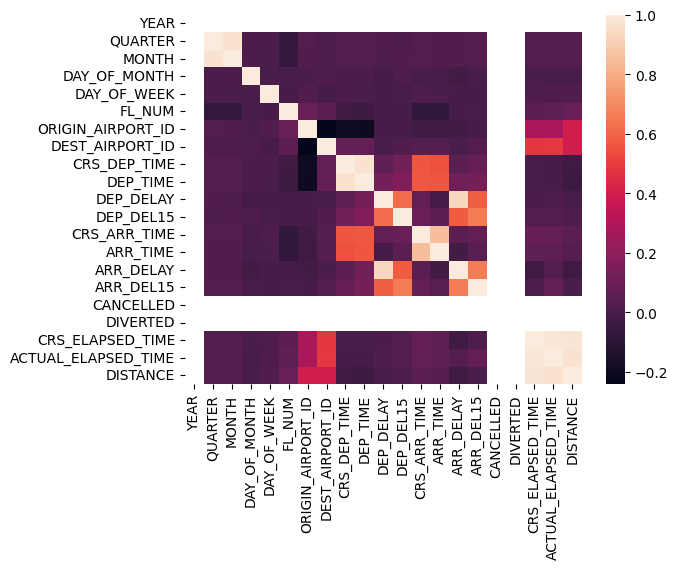

In [15]:
sns.heatmap(dataset.corr())

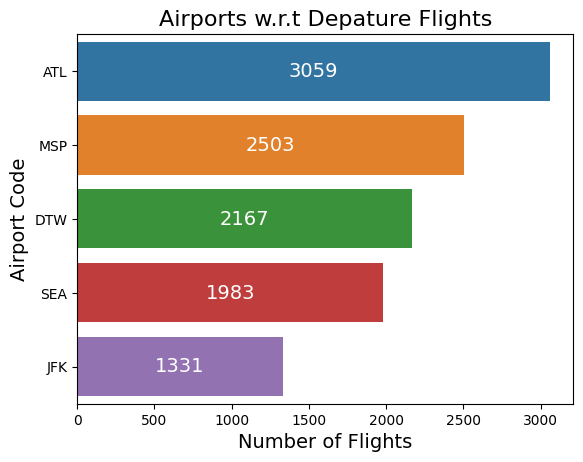

In [16]:
ax = sns.countplot(y = dataset['ORIGIN'], order = dataset['ORIGIN'].value_counts().index);
ax.set_title("Airports w.r.t Depature Flights", fontsize = 16);
ax.set_xlabel("Number of Flights", fontsize = 14);
ax.set_ylabel("Airport Code", fontsize = 14);
ax.bar_label(ax.containers[0], label_type = 'center', color = 'white', size = 14);

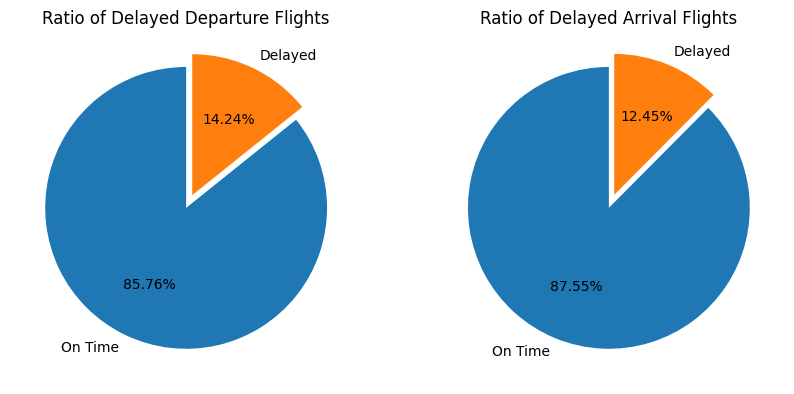

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (10,10))
ax[0].pie(dataset['DEP_DEL15'].value_counts(), labels = ['On Time', 'Delayed'], autopct = '%1.2f%%',startangle = 90, explode = (0,0.1));
ax[0].title.set_text("Ratio of Delayed Departure Flights");
ax[1].pie(dataset['ARR_DEL15'].value_counts(), labels = ['On Time','Delayed'], autopct = '%1.2f%%',startangle = 90, explode = (0,0.1));
ax[1].title.set_text("Ratio of Delayed Arrival Flights");

In [20]:
new_df = pd.get_dummies(dataset, columns = ['ORIGIN','DEST'])

In [21]:
new_df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,...,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,2016,1,1,1,5,DL,N836DN,1399,10397,14747,...,1,0,0,0,0,0,0,0,0,1
1,2016,1,1,1,5,DL,N964DN,1476,11433,13487,...,0,1,0,0,0,0,0,0,1,0
2,2016,1,1,1,5,DL,N813DN,1597,10397,14747,...,1,0,0,0,0,0,0,0,0,1
3,2016,1,1,1,5,DL,N587NW,1768,14747,13487,...,0,0,0,0,1,0,0,0,1,0
4,2016,1,1,1,5,DL,N836DN,1823,14747,11433,...,0,0,0,0,1,0,1,0,0,0


In [22]:
X = new_df[['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN_ATL','ORIGIN_DTW','ORIGIN_JFK','ORIGIN_MSP','ORIGIN_SEA','DEST_ATL','DEST_DTW','DEST_JFK','DEST_MSP','DEST_SEA','CRS_DEP_TIME','DEP_TIME','DEP_DEL15','CRS_ARR_TIME']]
y = new_df['ARR_DEL15']

In [31]:
print(X.head())
print(y.head())
print(X.shape)
print(y.shape)

   MONTH  DAY_OF_MONTH  DAY_OF_WEEK  ORIGIN_ATL  ORIGIN_DTW  ORIGIN_JFK  \
0      1             1            5           1           0           0   
1      1             1            5           0           1           0   
2      1             1            5           1           0           0   
3      1             1            5           0           0           0   
4      1             1            5           0           0           0   

   ORIGIN_MSP  ORIGIN_SEA  DEST_ATL  DEST_DTW  DEST_JFK  DEST_MSP  DEST_SEA  \
0           0           0         0         0         0         0         1   
1           0           0         0         0         0         1         0   
2           0           0         0         0         0         0         1   
3           0           1         0         0         0         1         0   
4           0           1         0         1         0         0         0   

   CRS_DEP_TIME  DEP_TIME  DEP_DEL15  CRS_ARR_TIME  
0          1905    19

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 4, random_state = 25)

In [29]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=4, random_state=25)

In [30]:
pred = clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9245396921219439


In [35]:
import pickle
pickle.dump(clf, open('flightdelay.pkl','wb'))